In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv').copy()
test=pd.read_csv('test.csv').copy()
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [3]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [4]:
train.shape

(8693, 14)

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
# Merging into one dataframe for easy feature Engineering
df=pd.concat([train,test],ignore_index=True)
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0         0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1         0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2         0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3         0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4         0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...           ...        ...       ...       ...            ...   ...    ...   
12965     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
12966     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
12967     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
12968     9273_01     Europa     False   D/297/P            NaN   NaN  False   
12969     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

       RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0              0.0        0.0           0.0     0.0     0.0   
1            109.0        9.0          25.0   549.0    44.0   
2             43.0     3576.0           0.0  6715.0    49.0   
3              0.0     1283.0         371.0  3329.0   193.0   
4            303.0       70.0         151.0   565.0     2.0   
...            ...        ...           ...     ...     ...   
12965          0.0        0.0           0.0     0.0     0.0   
12966          0.0      847.0          17.0    10.0   144.0   
12967          0.0        0.0           0.0     0.0     0.0   
12968          0.0     2680.0           0.0     0.0   523.0   
12969          0.0        0.0           0.0     0.0     0.0   

                    Name Transported  
0        Maham Ofracculy       False  
1           Juanna Vines        True  
2          Altark Susent       False  
3           Solam Susent       False  
4      Willy Santantines        True  
...                  ...         ...  
12965        Jeron Peter         NaN  
12966      Matty Scheron         NaN  
12967        Jayrin Pore         NaN  
12968     Kitakan Conale         NaN  
12969   Lilace Leonzaley         NaN  

[12970 rows x 14 columns]

In [8]:
df.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
12965     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
12966     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
12967     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
12968     9273_01     Europa     False   D/297/P            NaN   NaN  False   
12969     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

       RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  \
12965          0.0        0.0           0.0   0.0     0.0       Jeron Peter   
12966          0.0      847.0          17.0  10.0   144.0     Matty Scheron   
12967          0.0        0.0           0.0   0.0     0.0       Jayrin Pore   
12968          0.0     2680.0           0.0   0.0   523.0    Kitakan Conale   
12969          0.0        0.0           0.0   0.0     0.0  Lilace Leonzaley   

      Transported  
12965         NaN  
12966         NaN  
12967         NaN  
12968         NaN  
12969         NaN

## EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [10]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  12700.000000  12707.000000  12681.000000  12664.000000  12686.000000   
mean      28.771969    222.897852    451.961675    174.906033    308.476904   
std       14.387261    647.596664   1584.370747    590.558690   1130.279641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      0.000000      0.000000      0.000000      0.000000   
50%       27.000000      0.000000      0.000000      0.000000      0.000000   
75%       38.000000     49.000000     77.000000     29.000000     57.000000   
max       79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count  12702.000000  
mean     306.789482  
std     1180.097223  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       42.000000  
max    24133.000000

In [11]:
# Homeplanet 
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [12]:
df['HomePlanet'].dropna().value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

<AxesSubplot:>

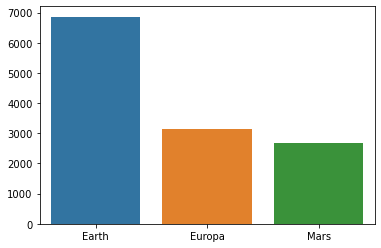

In [13]:
sns.barplot(x=df['HomePlanet'].dropna().value_counts().keys(),y=df['HomePlanet'].dropna().value_counts().values)

#### Most People from Earth

In [14]:
# CryoSleep
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [15]:
df['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

<AxesSubplot:>

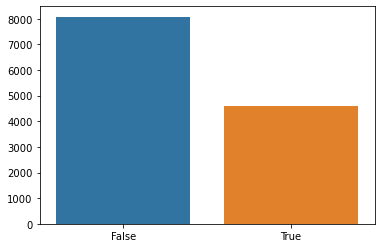

In [16]:
sns.barplot(x=df['CryoSleep'].value_counts().keys(),y=df['CryoSleep'].value_counts().values)

In [17]:
# Cabin
df['Cabin'].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [18]:
# Destination
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [19]:
df['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

<AxesSubplot:>

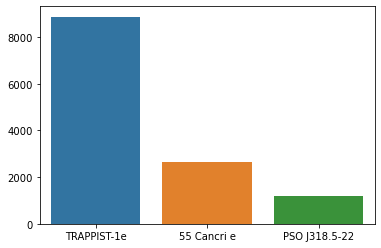

In [20]:
sns.barplot(x=df['Destination'].value_counts().keys(),y=df['Destination'].value_counts().values)

#### Most People were travelling to TRAPPIST-1e

In [21]:
# Age
df['Age']

0        39.0
1        24.0
2        58.0
3        33.0
4        16.0
         ... 
12965    34.0
12966    42.0
12967     NaN
12968     NaN
12969    43.0
Name: Age, Length: 12970, dtype: float64

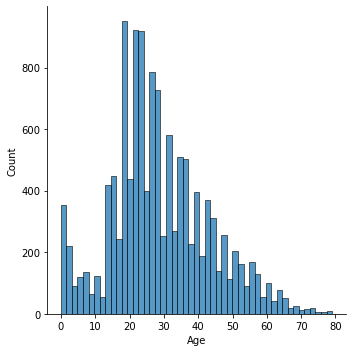

In [22]:
sns.displot(df['Age'].dropna())

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

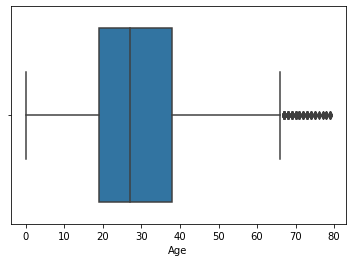

In [23]:
sns.boxplot(df['Age'].dropna()) # We cannot consider these outliers for removal

In [24]:
df['Age'].dropna().mean()

28.771968503937007

#### Most People of age 20-30 were travelling

In [25]:
# VIP
df['VIP'].unique()

array([False, True, nan], dtype=object)

<AxesSubplot:>

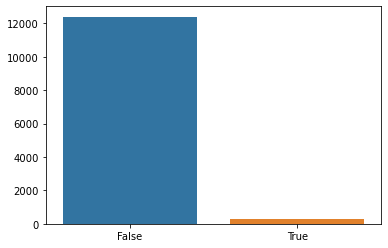

In [26]:
sns.barplot(x=df['VIP'].dropna().value_counts().keys(),y=df['VIP'].dropna().value_counts().values)

#### Very Less Vip were travelling

In [27]:
# RoomService FoodCourt ShoppingMall Spa VRDeck
df['RoomService']

0          0.0
1        109.0
2         43.0
3          0.0
4        303.0
         ...  
12965      0.0
12966      0.0
12967      0.0
12968      0.0
12969      0.0
Name: RoomService, Length: 12970, dtype: float64

In [28]:
total=[df['RoomService'].mean(),df['FoodCourt'].mean(),df['ShoppingMall'].mean(),df['Spa'].mean(),df['VRDeck'].mean()]
labels=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
total

[222.89785157787045,
 451.96167494677076,
 174.90603284902085,
 308.4769036733407,
 306.7894819713431]

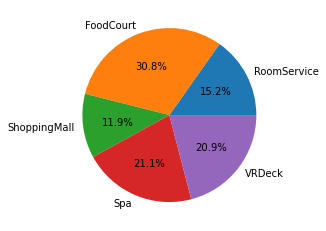

In [29]:
plt.pie(total,labels=labels,autopct='%.1f%%')
plt.show()

#### People on an average spent the most on FoodCourt , then Spa and Vrdeck

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


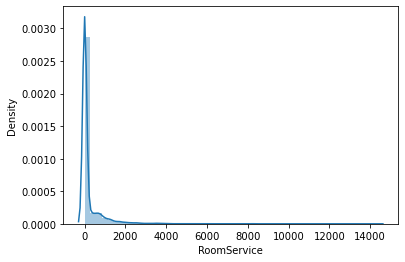

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


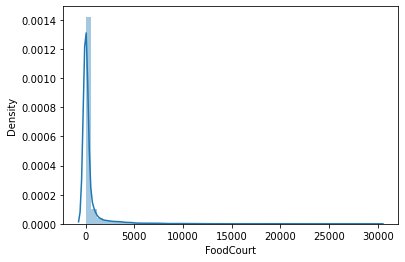

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


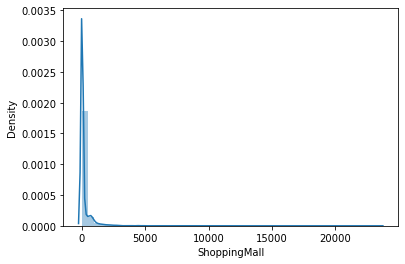

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


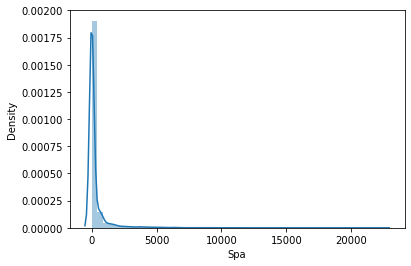

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


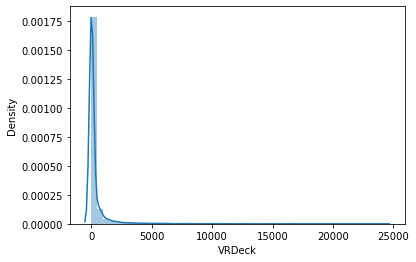

In [30]:
for i in labels:
    sns.distplot(df[i].dropna())
    plt.show()

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


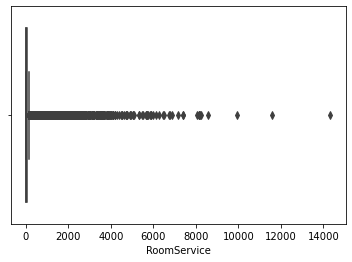

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


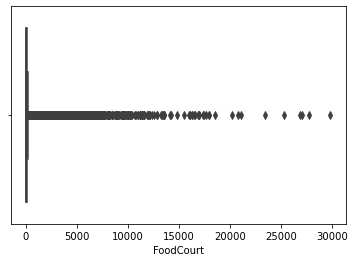

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


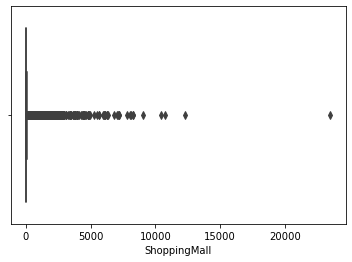

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


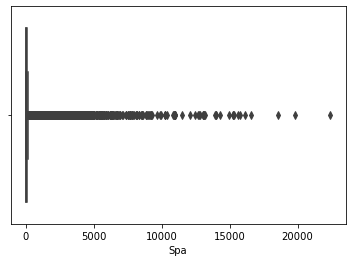

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


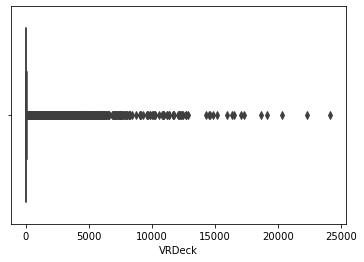

In [31]:
for i in labels:
    sns.boxplot(df[i].dropna())
    plt.show()

# Feature Engineering

### Handling Nan Value

In [85]:
df.isnull().sum()

PassengerId             0
CryoSleep               0
Age                     0
VIP                     0
Transported          4277
total_expenditure       0
55 Cancri e             0
PSO J318.5-22           0
TRAPPIST-1e             0
Earth                   0
Europa                  0
Mars                    0
M                       0
P                       0
S                       0
dtype: int64

In [33]:
for i in labels:
    df[i].fillna(df[i].median(),inplace=True)

In [34]:
# Creating New Column for Total Expenditure
df['total_expenditure']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  total_expenditure  
0       False                0.0  
1        True              736.0  
2       False            10383.0  
3       False             5176.0  
4        True             1091.0

In [35]:
for i in labels:
    df.drop(i,axis=1,inplace=True)

In [36]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [37]:
df.drop('Name',axis=1,inplace=True)

In [38]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0         0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1         0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2         0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3         0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4         0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...           ...        ...       ...       ...            ...   ...    ...   
12965     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
12966     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
12967     9271_01       Mars      True   D/296/P    55 Cancri e  27.0  False   
12968     9273_01     Europa     False   D/297/P            NaN  27.0  False   
12969     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      Transported  total_expenditure  
0           False                0.0  
1            True              736.0  
2           False            10383.0  
3           False             5176.0  
4            True             1091.0  
...           ...                ...  
12965         NaN                0.0  
12966         NaN             1018.0  
12967         NaN                0.0  
12968         NaN             3203.0  
12969         NaN                0.0  

[12970 rows x 9 columns]

In [39]:
# Vip
df['VIP']

0        False
1        False
2         True
3        False
4        False
         ...  
12965    False
12966    False
12967    False
12968    False
12969    False
Name: VIP, Length: 12970, dtype: object

In [40]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

In [43]:
df['CryoSleep']=df['CryoSleep'].apply(f)

In [42]:
def f(string):
    if string==False:
        return 0
    elif string==True:
        return 1
    else:
        return 0

In [44]:
df['CryoSleep'].value_counts()

0    8389
1    4581
Name: CryoSleep, dtype: int64

In [45]:
df['VIP']=df['VIP'].apply(f)

In [46]:
df.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01     Europa          0  B/0/P  TRAPPIST-1e  39.0    0   
1     0002_01      Earth          0  F/0/S  TRAPPIST-1e  24.0    0   
2     0003_01     Europa          0  A/0/S  TRAPPIST-1e  58.0    1   
3     0003_02     Europa          0  A/0/S  TRAPPIST-1e  33.0    0   
4     0004_01      Earth          0  F/1/S  TRAPPIST-1e  16.0    0   

  Transported  total_expenditure  
0       False                0.0  
1        True              736.0  
2       False            10383.0  
3       False             5176.0  
4        True             1091.0

In [48]:
# Destination
df['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [49]:
df['Destination'].value_counts()

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [50]:
df1=pd.get_dummies(df['Destination'])

In [56]:
# HomePlanet
df['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [55]:
df['HomePlanet'].fillna('Earth',inplace=True)

In [58]:
df2=pd.get_dummies(df['HomePlanet'])
df2

Earth  Europa  Mars
0          0       1     0
1          1       0     0
2          0       1     0
3          0       1     0
4          1       0     0
...      ...     ...   ...
12965      1       0     0
12966      1       0     0
12967      0       0     1
12968      0       1     0
12969      1       0     0

[12970 rows x 3 columns]

In [59]:
df=pd.concat([df,df1,df2],axis='columns')
df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0         0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1         0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2         0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3         0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4         0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...           ...        ...        ...       ...            ...   ...  ...   
12965     9266_02      Earth          1  G/1496/S    TRAPPIST-1e  34.0    0   
12966     9269_01      Earth          0       NaN    TRAPPIST-1e  42.0    0   
12967     9271_01       Mars          1   D/296/P    55 Cancri e  27.0    0   
12968     9273_01     Europa          0   D/297/P    TRAPPIST-1e  27.0    0   
12969     9277_01      Earth          1  G/1498/S  PSO J318.5-22  43.0    0   

      Transported  total_expenditure  55 Cancri e  PSO J318.5-22  TRAPPIST-1e  \
0           False                0.0            0              0            1   
1            True              736.0            0              0            1   
2           False            10383.0            0              0            1   
3           False             5176.0            0              0            1   
4            True             1091.0            0              0            1   
...           ...                ...          ...            ...          ...   
12965         NaN                0.0            0              0            1   
12966         NaN             1018.0            0              0            1   
12967         NaN                0.0            1              0            0   
12968         NaN             3203.0            0              0            1   
12969         NaN                0.0            0              1            0   

       Earth  Europa  Mars  
0          0       1     0  
1          1       0     0  
2          0       1     0  
3          0       1     0  
4          1       0     0  
...      ...     ...   ...  
12965      1       0     0  
12966      1       0     0  
12967      0       0     1  
12968      0       1     0  
12969      1       0     0  

[12970 rows x 15 columns]

In [64]:
df.drop('HomePlanet',axis=1,inplace=True)


PassengerId  CryoSleep     Cabin    Destination   Age  VIP Transported  \
0         0001_01          0     B/0/P    TRAPPIST-1e  39.0    0       False   
1         0002_01          0     F/0/S    TRAPPIST-1e  24.0    0        True   
2         0003_01          0     A/0/S    TRAPPIST-1e  58.0    1       False   
3         0003_02          0     A/0/S    TRAPPIST-1e  33.0    0       False   
4         0004_01          0     F/1/S    TRAPPIST-1e  16.0    0        True   
...           ...        ...       ...            ...   ...  ...         ...   
12965     9266_02          1  G/1496/S    TRAPPIST-1e  34.0    0         NaN   
12966     9269_01          0       NaN    TRAPPIST-1e  42.0    0         NaN   
12967     9271_01          1   D/296/P    55 Cancri e  27.0    0         NaN   
12968     9273_01          0   D/297/P    TRAPPIST-1e  27.0    0         NaN   
12969     9277_01          1  G/1498/S  PSO J318.5-22  43.0    0         NaN   

       total_expenditure  55 Cancri e  PSO J318.5-22  TRAPPIST-1e  Earth  \
0                    0.0            0              0            1      0   
1                  736.0            0              0            1      1   
2                10383.0            0              0            1      0   
3                 5176.0            0              0            1      0   
4                 1091.0            0              0            1      1   
...                  ...          ...            ...          ...    ...   
12965                0.0            0              0            1      1   
12966             1018.0            0              0            1      1   
12967                0.0            1              0            0      0   
12968             3203.0            0              0            1      0   
12969                0.0            0              1            0      1   

       Europa  Mars  
0           1     0  
1           0     0  
2           1     0  
3           1     0  
4           0     0  
...       ...   ...  
12965       0     0  
12966       0     0  
12967       0     1  
12968       1     0  
12969       0     0  

[12970 rows x 14 columns]

In [65]:
df.drop('Destination',axis=1,inplace=True)

In [66]:
df

PassengerId  CryoSleep     Cabin   Age  VIP Transported  \
0         0001_01          0     B/0/P  39.0    0       False   
1         0002_01          0     F/0/S  24.0    0        True   
2         0003_01          0     A/0/S  58.0    1       False   
3         0003_02          0     A/0/S  33.0    0       False   
4         0004_01          0     F/1/S  16.0    0        True   
...           ...        ...       ...   ...  ...         ...   
12965     9266_02          1  G/1496/S  34.0    0         NaN   
12966     9269_01          0       NaN  42.0    0         NaN   
12967     9271_01          1   D/296/P  27.0    0         NaN   
12968     9273_01          0   D/297/P  27.0    0         NaN   
12969     9277_01          1  G/1498/S  43.0    0         NaN   

       total_expenditure  55 Cancri e  PSO J318.5-22  TRAPPIST-1e  Earth  \
0                    0.0            0              0            1      0   
1                  736.0            0              0            1      1   
2                10383.0            0              0            1      0   
3                 5176.0            0              0            1      0   
4                 1091.0            0              0            1      1   
...                  ...          ...            ...          ...    ...   
12965                0.0            0              0            1      1   
12966             1018.0            0              0            1      1   
12967                0.0            1              0            0      0   
12968             3203.0            0              0            1      0   
12969                0.0            0              1            0      1   

       Europa  Mars  
0           1     0  
1           0     0  
2           1     0  
3           1     0  
4           0     0  
...       ...   ...  
12965       0     0  
12966       0     0  
12967       0     1  
12968       1     0  
12969       0     0  

[12970 rows x 13 columns]

In [70]:
# Cabin
df['Cabin']=df['Cabin'].str.split('/').str[2]

In [76]:
df['Cabin'].value_counts()

S    6381
P    6290
M     299
Name: Cabin, dtype: int64

In [75]:
df['Cabin'].fillna('M',inplace=True)

In [79]:
df3=pd.get_dummies(df['Cabin'])

In [81]:
df=pd.concat([df,df3],axis='columns')

In [83]:
df.drop('Cabin',axis=1,inplace=True)

In [84]:
df

PassengerId  CryoSleep   Age  VIP Transported  total_expenditure  \
0         0001_01          0  39.0    0       False                0.0   
1         0002_01          0  24.0    0        True              736.0   
2         0003_01          0  58.0    1       False            10383.0   
3         0003_02          0  33.0    0       False             5176.0   
4         0004_01          0  16.0    0        True             1091.0   
...           ...        ...   ...  ...         ...                ...   
12965     9266_02          1  34.0    0         NaN                0.0   
12966     9269_01          0  42.0    0         NaN             1018.0   
12967     9271_01          1  27.0    0         NaN                0.0   
12968     9273_01          0  27.0    0         NaN             3203.0   
12969     9277_01          1  43.0    0         NaN                0.0   

       55 Cancri e  PSO J318.5-22  TRAPPIST-1e  Earth  Europa  Mars  M  P  S  
0                0              0            1      0       1     0  0  1  0  
1                0              0            1      1       0     0  0  0  1  
2                0              0            1      0       1     0  0  0  1  
3                0              0            1      0       1     0  0  0  1  
4                0              0            1      1       0     0  0  0  1  
...            ...            ...          ...    ...     ...   ... .. .. ..  
12965            0              0            1      1       0     0  0  0  1  
12966            0              0            1      1       0     0  1  0  0  
12967            1              0            0      0       0     1  0  1  0  
12968            0              0            1      0       1     0  0  1  0  
12969            0              1            0      1       0     0  0  0  1  

[12970 rows x 15 columns]

In [92]:
final_train=df[0:8693]
final_test=df[8693:]
final_train
final_test

PassengerId  CryoSleep   Age  VIP Transported  total_expenditure  \
8693      0013_01          1  27.0    0         NaN                0.0   
8694      0018_01          0  19.0    0         NaN             2832.0   
8695      0019_01          1  31.0    0         NaN                0.0   
8696      0021_01          0  38.0    0         NaN             7418.0   
8697      0023_01          0  20.0    0         NaN              645.0   
...           ...        ...   ...  ...         ...                ...   
12965     9266_02          1  34.0    0         NaN                0.0   
12966     9269_01          0  42.0    0         NaN             1018.0   
12967     9271_01          1  27.0    0         NaN                0.0   
12968     9273_01          0  27.0    0         NaN             3203.0   
12969     9277_01          1  43.0    0         NaN                0.0   

       55 Cancri e  PSO J318.5-22  TRAPPIST-1e  Earth  Europa  Mars  M  P  S  
8693             0              0            1      1       0     0  0  0  1  
8694             0              0            1      1       0     0  0  0  1  
8695             1              0            0      0       1     0  0  0  1  
8696             0              0            1      0       1     0  0  0  1  
8697             0              0            1      1       0     0  0  0  1  
...            ...            ...          ...    ...     ...   ... .. .. ..  
12965            0              0            1      1       0     0  0  0  1  
12966            0              0            1      1       0     0  1  0  0  
12967            1              0            0      0       0     1  0  1  0  
12968            0              0            1      0       1     0  0  1  0  
12969            0              1            0      1       0     0  0  0  1  

[4277 rows x 15 columns]

In [93]:
final_test.drop('Transported',axis=1,inplace=True)
final_test.drop('PassengerId',axis=1,inplace=True)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
final_train.drop('PassengerId',axis=1,inplace=True)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
final_train['Transported']=final_train['Transported'].apply(f)

C:\Users\mohan\AppData\Local\Temp/ipykernel_27032/2549910013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train['Transported']=final_train['Transported'].apply(f)


In [103]:
Y_train=final_train['Transported']

In [104]:
Y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [106]:
final_train.drop('Transported',axis=1,inplace=True)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


X_train=final_train
X_train

In [109]:
Y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [112]:
X_test=final_test
X_test

CryoSleep   Age  VIP  total_expenditure  55 Cancri e  PSO J318.5-22  \
8693           1  27.0    0                0.0            0              0   
8694           0  19.0    0             2832.0            0              0   
8695           1  31.0    0                0.0            1              0   
8696           0  38.0    0             7418.0            0              0   
8697           0  20.0    0              645.0            0              0   
...          ...   ...  ...                ...          ...            ...   
12965          1  34.0    0                0.0            0              0   
12966          0  42.0    0             1018.0            0              0   
12967          1  27.0    0                0.0            1              0   
12968          0  27.0    0             3203.0            0              0   
12969          1  43.0    0                0.0            0              1   

       TRAPPIST-1e  Earth  Europa  Mars  M  P  S  
8693             1      1       0     0  0  0  1  
8694             1      1       0     0  0  0  1  
8695             0      0       1     0  0  0  1  
8696             1      0       1     0  0  0  1  
8697             1      1       0     0  0  0  1  
...            ...    ...     ...   ... .. .. ..  
12965            1      1       0     0  0  0  1  
12966            1      1       0     0  1  0  0  
12967            0      0       0     1  0  1  0  
12968            1      0       1     0  0  1  0  
12969            0      1       0     0  0  0  1  

[4277 rows x 13 columns]

In [119]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [123]:
X_train1=scaler.transform(X_train)
X_train1.shape

(8693, 13)

In [124]:
X_test1=scaler.transform(X_test)
X_test1

array([[ 1.36468464, -0.12484091, -0.15306307, ..., -0.15306307,
        -0.9681811 ,  1.01355091],
       [-0.73277002, -0.68269843, -0.15306307, ..., -0.15306307,
        -0.9681811 ,  1.01355091],
       [ 1.36468464,  0.15408785, -0.15306307, ..., -0.15306307,
        -0.9681811 ,  1.01355091],
       ...,
       [ 1.36468464, -0.12484091, -0.15306307, ..., -0.15306307,
         1.03286462, -0.98663026],
       [-0.73277002, -0.12484091, -0.15306307, ..., -0.15306307,
         1.03286462, -0.98663026],
       [ 1.36468464,  0.99087413, -0.15306307, ..., -0.15306307,
        -0.9681811 ,  1.01355091]])

## Model (Without Hyperparameter Tuning)

In [125]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [129]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [130]:
model1.score(X_train,Y_train)

0.7264465662026918

In [144]:
# Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [145]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [146]:
model2.score(X_train,Y_train)

0.9338548257218452

In [138]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

In [139]:
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [140]:
model3.score(X_train,Y_train)

0.9338548257218452

In [148]:
# Predicting Final 
ans=model3.predict(X_test)

In [153]:
ans

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [154]:
id=test['PassengerId']
id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [155]:
data={'PassengerId':id,'Transported':ans}

In [156]:
Ans=pd.DataFrame(data)
Ans

PassengerId  Transported
0        0013_01            1
1        0018_01            0
2        0019_01            1
3        0021_01            0
4        0023_01            0
...          ...          ...
4272     9266_02            1
4273     9269_01            0
4274     9271_01            1
4275     9273_01            1
4276     9277_01            0

[4277 rows x 2 columns]

In [160]:
def v(num):
    if num==1:
        return 'True'
    else:
        return 'False'

In [161]:
Ans['Transported']=Ans['Transported'].apply(v)

In [164]:
Ans.to_csv('Answers.csv',index=False)